In [52]:
import sympy as sym
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt


In [53]:
# the first method. Symbolic. 

In [54]:
t=sym.symbols('t')
Vo=sym.symbols('Vo',cls=sym.Function)
C=1e-6
R=1e3
tao=R*C
Vi=5

In [55]:
eq1=sym.Eq(C*Vo(t).diff(t),(Vi-Vo(t))/R) #rising
eq2=sym.Eq(C*Vo(t).diff(),(0-Vo(t))/R)   #falling

In [56]:
ans1=sym.dsolve(eq1,Vo(t),ics={Vo(0):0})
ans2=sym.dsolve(eq2,Vo(t),ics={Vo(0):Vi})


In [57]:
#sym.pi.evalf(15)


In [58]:
# cast the symbolic objects to digital ones

In [59]:
rise=sym.lambdify(t,ans1.rhs,'numpy')
fall=sym.lambdify(t,ans2.rhs,'numpy')

In [60]:
rise(tao)/Vi

0.6321205588285577

In [61]:
fall(tao)/Vi

0.36787944117144233

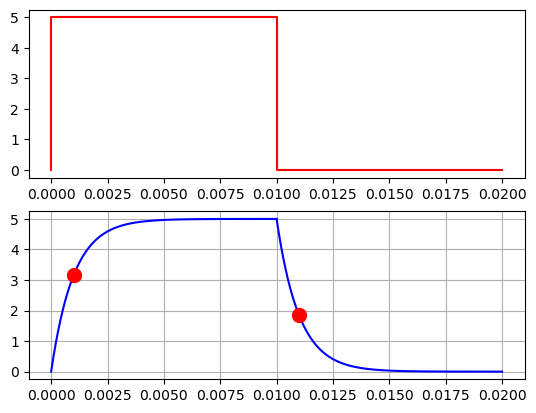

In [62]:
t=np.linspace(0,10*tao,300)

plt.subplot(211)  # input
x=np.array([0,0,tao*10,tao*10,tao*20])
y=np.array([0,Vi,Vi,0,0])
plt.plot(x,y,'r-')

plt.subplot(212)  #output
plt.plot(t,rise(t),'b-')
plt.plot(t+10*tao,fall(t),'b-')
plt.grid()
plt.plot(tao,rise(tao),'ro',markersize=10)
plt.plot(tao+10*tao,fall(tao),'ro',markersize=10)

In [ ]:
# X=[x,xDot,xDot2]
# V=[xDot,xDot2,-xDot2/tao]


In [63]:
# The 3rd method. 

def f(t,X):
    return [X[1],X[2],-1/tao*X[2]]

In [78]:
ans1=sp.integrate.solve_ivp(f,(0,4),[0,Vi/tao,Vi/tao/(-tao)],dense_output=True)
ans2=sp.integrate.solve_ivp(f,(0,4),[Vi,Vi/(-tao),Vi/(-tao)**2],dense_output=True)

In [79]:
ans1

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.828e-07 ...  3.999e+00  4.000e+00]
        y: [[ 0.000e+00  1.414e-03 ...  5.000e+00  5.000e+00]
            [ 5.000e+03  4.999e+03 ...  7.448e-10  2.091e-10]
            [-5.000e+06 -4.999e+06 ... -7.432e-07 -2.075e-07]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x0000022476C8EDB0>
 t_events: None
 y_events: None
     nfev: 8528
     njev: 0
      nlu: 0

In [80]:
riseDigital=ans1.sol(t)
riseDigital.shape
fallDigital=ans2.sol(t)

In [81]:
riseDigital[:,:3]


array([[ 0.00000000e+00,  1.64458612e-01,  3.23508898e-01],
       [ 5.00000000e+03,  4.83554139e+03,  4.67649110e+03],
       [-5.00000000e+06, -4.83554139e+06, -4.67649110e+06]])

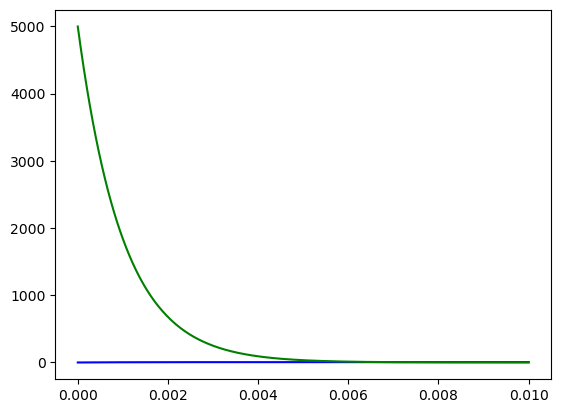

In [82]:
plt.plot(t,riseDigital[0,:],'b-')
plt.plot(t,riseDigital[1,:],'g-')

In [83]:
# the whole time series 

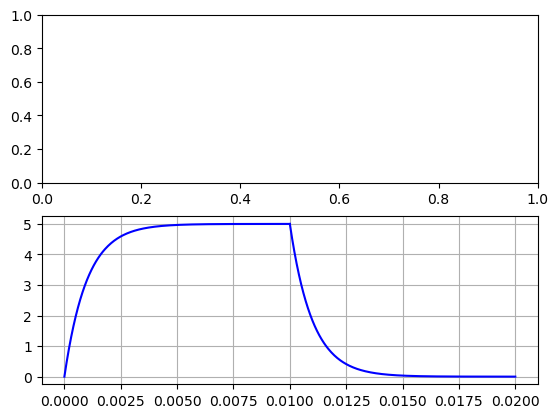

In [84]:
plt.subplot(211)
plt.subplot(212)
plt.plot(t,riseDigital[0,:],'b-')
plt.plot(t+10*tao,fallDigital[0,:],'b-')
plt.grid()